In [6]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['axes.titlesize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})
#import scienceplots
#plt.style.use(['science','ieee'])

from tqdm import tqdm
import random
import os
import time
import h5py
from datetime import datetime


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries

import auxLib; importlib.reload(auxLib)

Importing library...
Library successfully imported


<module 'auxLib' from 'd:\\Facultad\\Doctorado\\Proyectos\\paper\\auxLib.py'>

# Main variables

In [7]:
L = 40

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

neurons = 200

seed = 15

callbacks = auxLib.myCallback() # to be able to stop training if accuracy is high enough

In [8]:
training = ['para', 'ferro', 'neel','stripe']

modelsfolder, resultsfolder = auxLib.folders(directory=None, training=training, percolation=True)


In [9]:
data = auxLib.SyntheticImagesGen(training=training, L=L)

# Generate synthetic data

train_images, train_labels = data.dataGenerator(10000)
test_images, test_labels = data.dataGenerator(1000)

train_images = train_images.reshape((10000, L * L))
test_images = test_images.reshape((1000, L * L))

Generating synthetic data...
Done!
Elapsed time: 0.4044528007507324 seconds
Generating synthetic data...
Done!
Elapsed time: 0.012691020965576172 seconds


# Creating and training models

Now we should use the results of the critical temperatures of each training to decide what number of neurons will we use for percolation problem. We will use 200 neurons.

In [10]:
np.random.seed(seed)

kernel_regularizer=tf.keras.regularizers.l2(0.01)

dnn = auxLib.DenseNeuralNetworkGen() # Initializing. It generates the model

dnn.build_model((L*L,), num_classes=4, layers=[
{'type': 'dense', 'units': neurons, 'activation': 'relu', 'kernel_regularizer': kernel_regularizer},
{'type': 'dropout', 'rate': 0.2},
{'type': 'dense', 'units': 4, 'activation': 'softmax'} #2 is the number of classes: Paramagnetic and ferromagnetic
])

dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn.summary()

dnn.fit(train_images, train_labels, 
		epochs=50, batch_size=20,
		validation_data=(test_images, test_labels), 
		callbacks=[callbacks],
		verbose=False)

dnn.save_weights(f'dnn_n{neurons}_DO02', directory=modelsfolder) # name of the model (exclude the 'weights' and the extension)
dnn.save_model(f'dnn_n{neurons}_DO02', directory=modelsfolder)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               320200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 804       
                                                                 
Total params: 321004 (1.22 MB)
Trainable params: 321004 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\All\models\2024-08-20\dnn_n200_DO02.h5


C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Predictions

In [11]:
# Simulated images

loader_init = auxLib.loader_and_saver(os.getcwd())


In [12]:

for densitiy_index, density in enumerate(densities):
    
    sim_images, temperature = loader_init.simulatedImages(densitiy_index)

    model_path = os.path.join(modelsfolder, f'dnn_n{neurons}_DO02.h5')

    dnn = keras.models.load_model(model_path)

    prediction = auxLib.predictor(L, dnn, sim_images, 
                                name=f'{densities_str[densitiy_index]}',
								training=training,
                                directory=resultsfolder, 
                                reshape = True, 
                                verbose=False, 
                                save_prediction=True)


Loading simulated images...


Loading arrays: 100%|██████████| 196/196 [00:03<00:00, 56.29array/s]


Files loaded!
Data of density p = 0.55 succesfully loaded.


Predicting: 100%|██████████| 195/195 [00:17<00:00, 10.92repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 150/150 [00:04<00:00, 36.19array/s]


Files loaded!
Data of density p = 0.6 succesfully loaded.


Predicting: 100%|██████████| 149/149 [00:14<00:00, 10.43repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 199/199 [00:03<00:00, 62.35array/s]


Files loaded!
Data of density p = 0.61 succesfully loaded.


Predicting: 100%|██████████| 198/198 [00:18<00:00, 10.58repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 187/187 [00:02<00:00, 65.00array/s]


Files loaded!
Data of density p = 0.62 succesfully loaded.


Predicting: 100%|██████████| 186/186 [00:15<00:00, 12.09repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 163/163 [00:02<00:00, 72.18array/s]


Files loaded!
Data of density p = 0.63 succesfully loaded.


Predicting: 100%|██████████| 162/162 [00:13<00:00, 12.12repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 142/142 [00:01<00:00, 85.17array/s]


Files loaded!
Data of density p = 0.64 succesfully loaded.


Predicting: 100%|██████████| 141/141 [00:11<00:00, 12.47repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 161/161 [00:01<00:00, 87.68array/s]


Files loaded!
Data of density p = 0.65 succesfully loaded.


Predicting: 100%|██████████| 160/160 [00:15<00:00, 10.28repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 151/151 [00:01<00:00, 85.19array/s]


Files loaded!
Data of density p = 0.7 succesfully loaded.


Predicting: 100%|██████████| 150/150 [00:11<00:00, 12.94repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 155/155 [00:01<00:00, 86.20array/s]


Files loaded!
Data of density p = 0.8 succesfully loaded.


Predicting: 100%|██████████| 154/154 [00:11<00:00, 12.98repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 139/139 [00:01<00:00, 93.82array/s]


Files loaded!
Data of density p = 0.9 succesfully loaded.


Predicting: 100%|██████████| 138/138 [00:10<00:00, 12.66repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 156/156 [00:01<00:00, 81.95array/s] 


Files loaded!
Data of density p = 1. succesfully loaded.


Predicting: 100%|██████████| 155/155 [00:12<00:00, 12.86repetitions/s]


# Calculating critical temperature

Prediction for rho = 0.55
T_c = 0


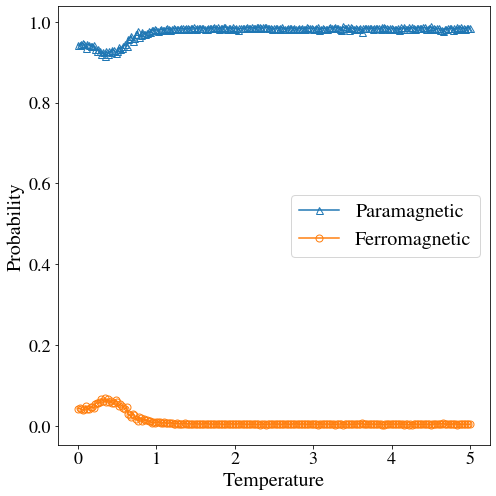

Prediction for rho = 0.6
T_c = 0


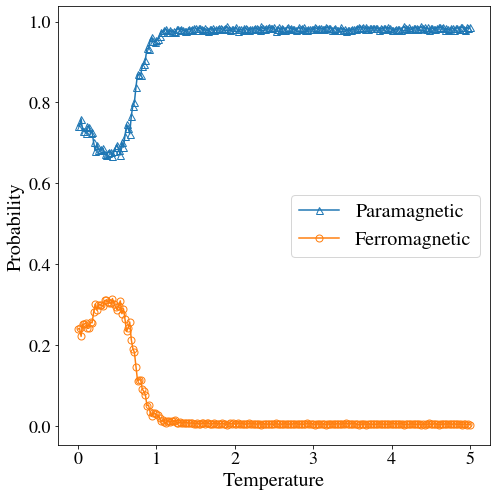

Prediction for rho = 0.61
T_c = 0


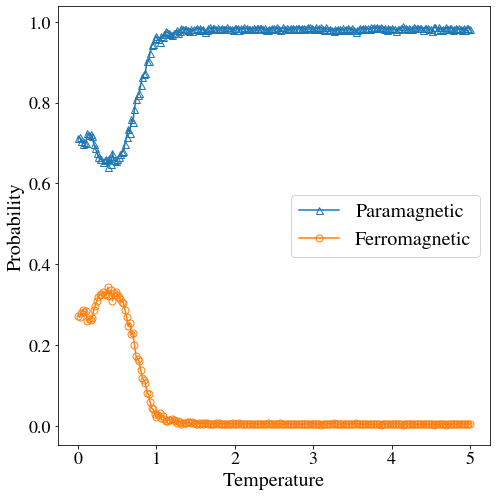

Prediction for rho = 0.62
T_c = 0


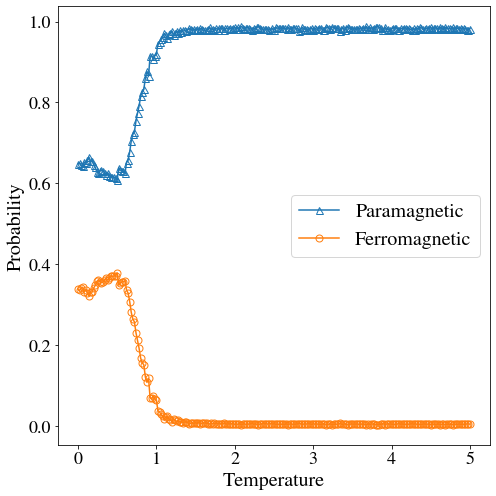

Prediction for rho = 0.63
T_c = 0.5110029487786232


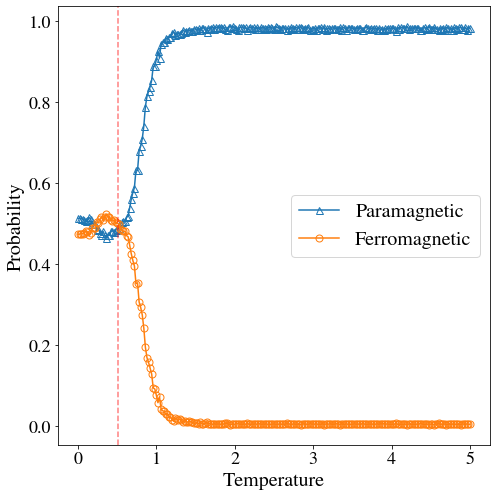

Prediction for rho = 0.64
T_c = 0.7415138107469433


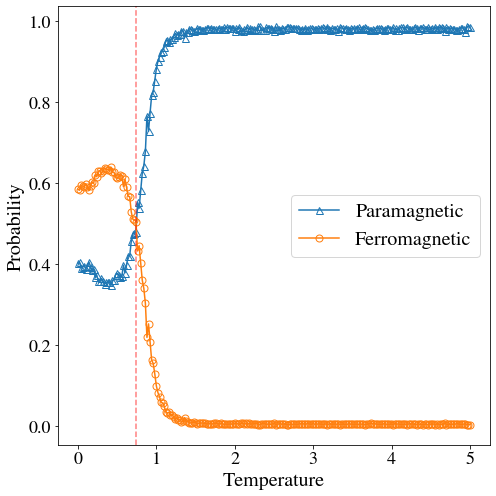

Prediction for rho = 0.65
T_c = 0.8249127515763371


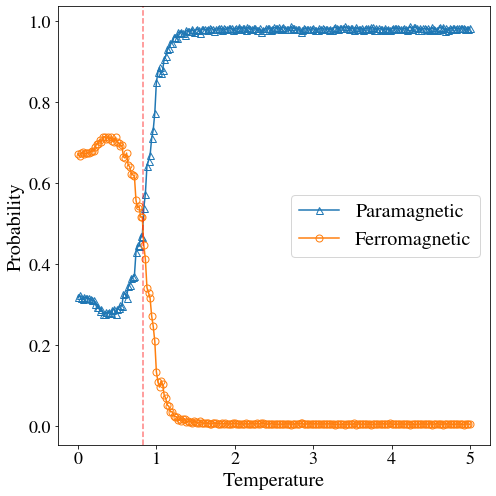

Prediction for rho = 0.7
T_c = 1.1041534005725677


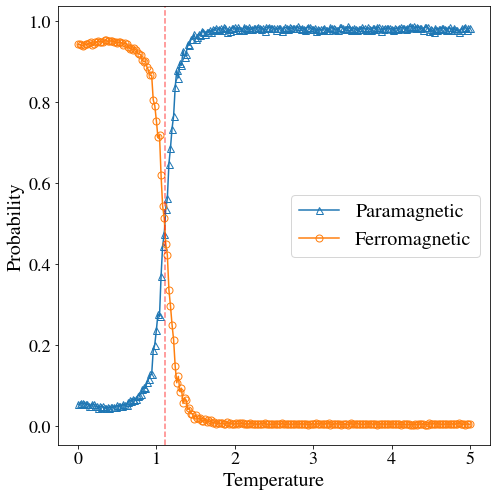

Prediction for rho = 0.8
T_c = 1.557892295532282


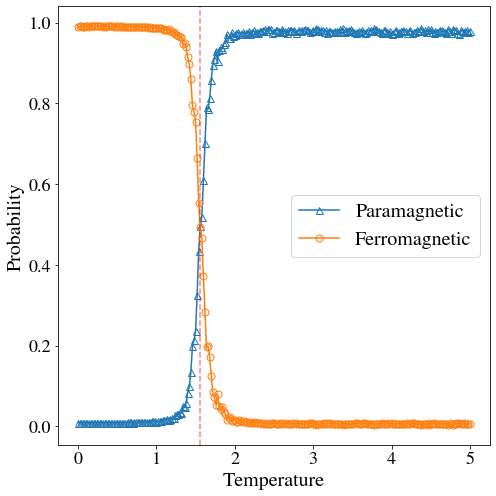

Prediction for rho = 0.9
T_c = 1.9475460455190716


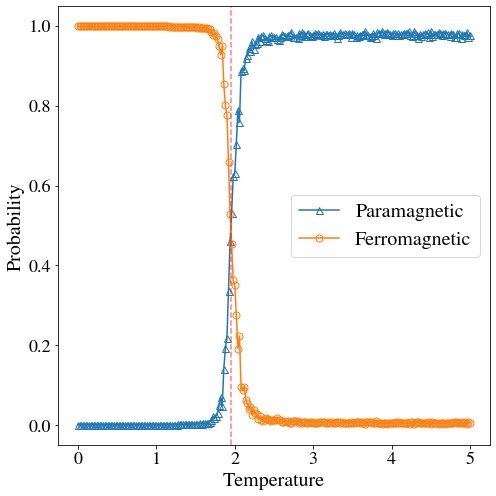

Prediction for rho = 1.0
T_c = 2.3142992851837723


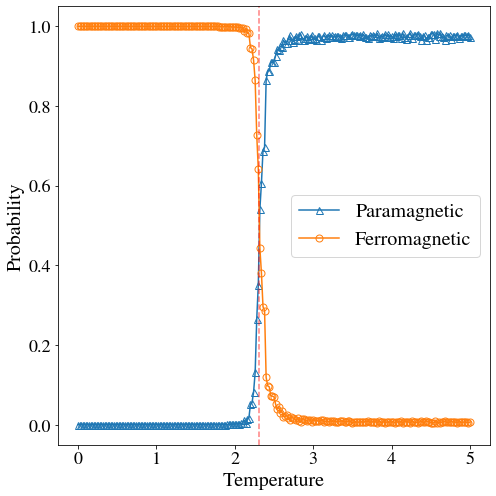

In [14]:
critical_temperatures = []

for density_index, density in enumerate(densities):
    prediction = pd.read_csv(resultsfolder+f'/predictions_{densities_str[density_index]}.csv', header=0).to_numpy(float)
    temperature, para, ferro, neel, stripe = prediction.T

    print(f'Prediction for rho = {density}')

    plt.figure(figsize=(7, 7))
    plt.plot(temperature, para, '^-', label='Paramagnetic', markerfacecolor='none', markersize=7)
    plt.plot(temperature, ferro, 'o-', label='Ferromagnetic', markerfacecolor='none', markersize=7)
    plt.xlabel('Temperature')
    plt.ylabel('Probability')
    plt.legend()

    if max(ferro)<0.5:
        tc = 0
    else:
        index_half = np.where(ferro > 0.5)[0][-1]
        if index_half == 250:
            index_half = 249
        # Interpolation:
        tc = temperature[index_half] + (ferro[index_half]-0.5)*(temperature[index_half+1] - temperature[index_half]) / (ferro[index_half] - ferro[index_half+1])
        plt.axvline(x=tc,  color = 'red', linestyle = '--', alpha = 0.5)

    critical_temperatures.append(tc)
    print(f'T_c = {tc}')
    plt.savefig(os.path.join(resultsfolder, f'critical_temperature_{densities_str[density_index]}.pdf'))
    plt.show()

# $T_c$ vs $\rho$

In [15]:
temp = pd.DataFrame((np.concatenate((np.array(densities).reshape(len(densities),1), 
                                    np.array(critical_temperatures).reshape(len(densities),1)),axis=1)), 
                                    columns=['Density','Temperature'])
temp.to_csv(os.path.join(resultsfolder, 'critical_temperatures_vs_density.csv'), index=False)

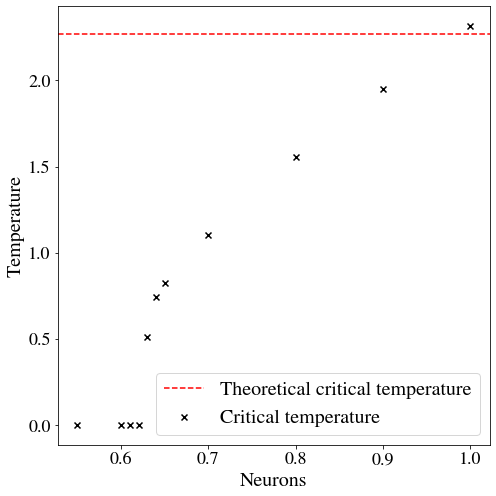

In [26]:
temp = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures_vs_density.csv'))

plt.figure(figsize=(7, 7))
plt.scatter(temp['Density'],temp['Temperature'], marker='x', color='black', label='Critical temperature')
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')
plt.xlabel(r'Density ($\rho=1$)')
plt.ylabel('Temperature')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures_vs_density.pdf'))
plt.show()

Using the critical temperature scaled by the critical temperature at $\rho=1$ and comparing with the theoretical curve we get

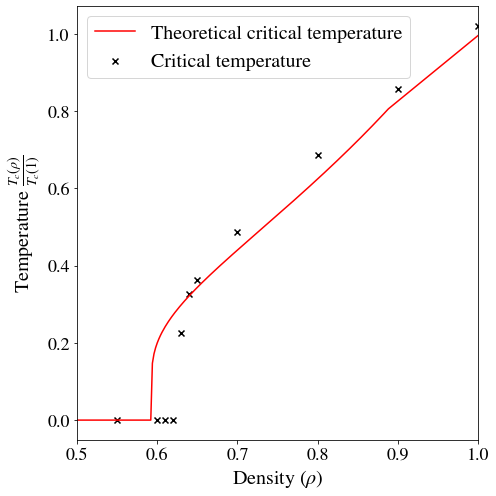

In [36]:
temp = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures_vs_density.csv'))

sim_density = np.arange(0.0,1.002,0.002)
theoretical_curve = sim_density*0
for i in range(len(sim_density)):
    if sim_density[i]<0.592746:
        theoretical_curve[i] = 0
    elif sim_density[i]<0.89:
        theoretical_curve[i] = -(0.983)/(np.log(sim_density[i]-0.592746))  
        last_i = i

for i in range(last_i, len(sim_density)):
     theoretical_curve[i] = theoretical_curve[last_i] + 1.7 * (sim_density[i]-sim_density[last_i])

plt.figure(figsize=(7, 7))
plt.scatter(temp['Density'],temp['Temperature']/2.269, marker='x', color='black', label='Critical temperature')#np.array(temp_df['Temperatura'])[-1],'x--')
plt.plot(sim_density, theoretical_curve,'r', label = 'Theoretical critical temperature')
plt.xlabel(r'Density ($\rho$)')
plt.ylabel(r'Temperature $\frac{T_c(\rho)}{T_c(1)}$')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='upper left')
plt.xlim(0.5,1)
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures_vs_density.pdf'))
plt.show()


# Calculating critical temperature using Half-height method

What happens if we calculate the critical temperature but using the half-height method?

Prediction for rho = 0.55


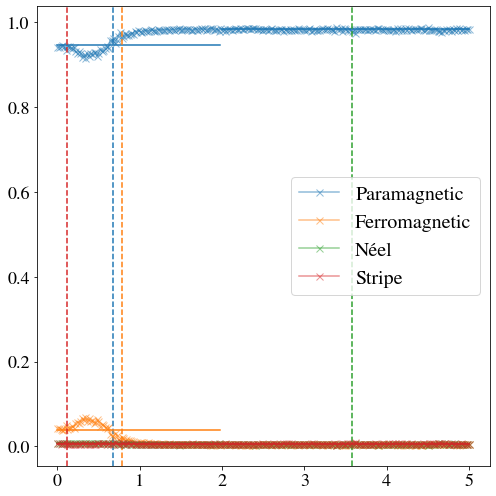

Prediction for rho = 0.6


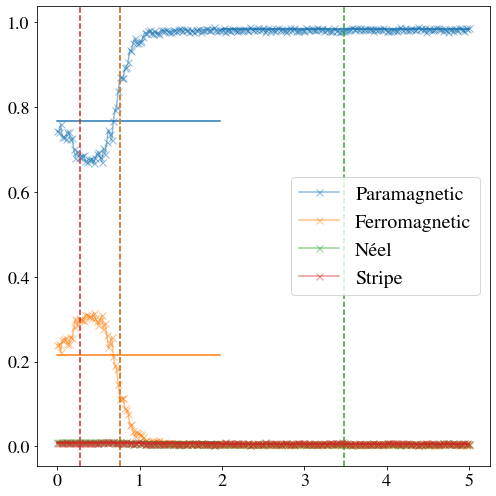

Prediction for rho = 0.61


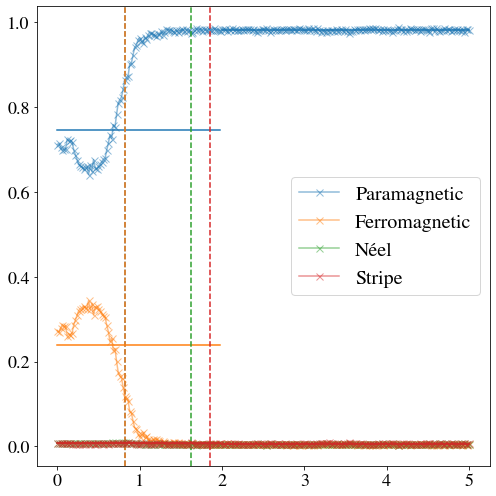

Prediction for rho = 0.62


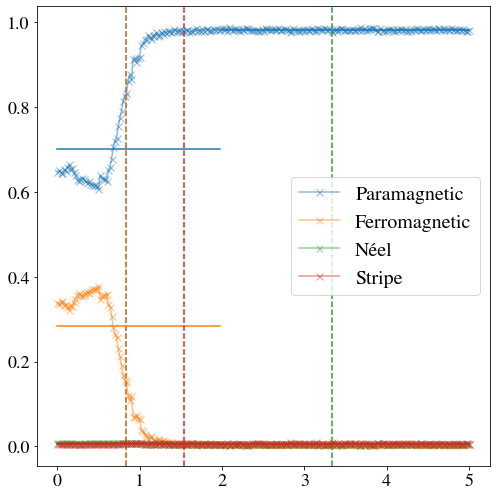

Prediction for rho = 0.63


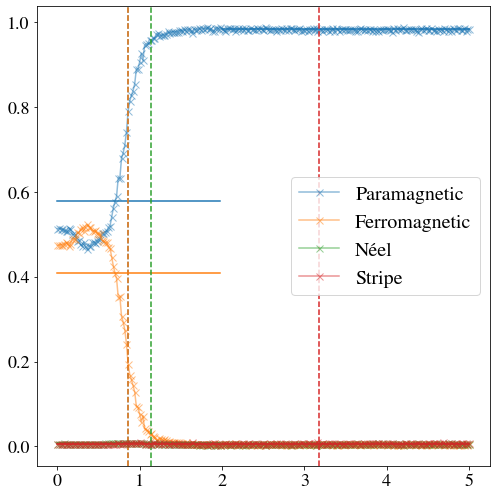

Prediction for rho = 0.64


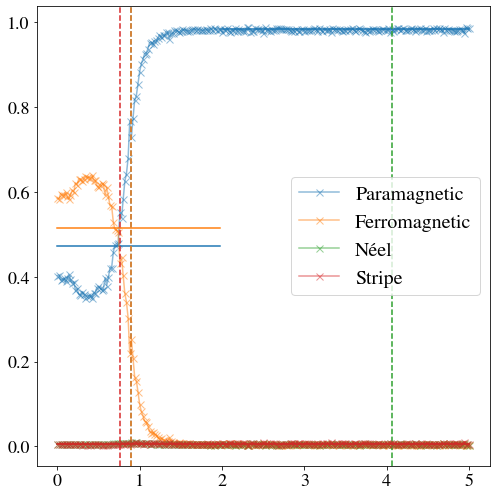

Prediction for rho = 0.65


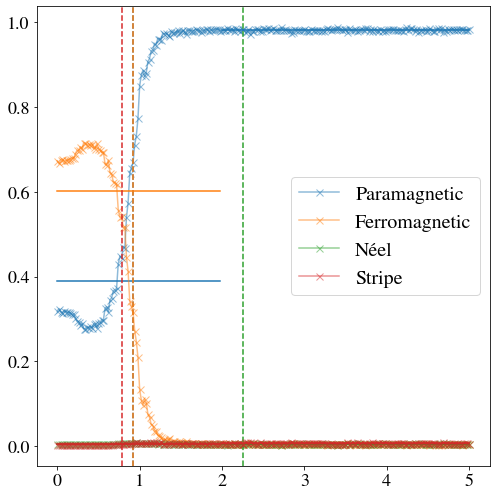

Prediction for rho = 0.7


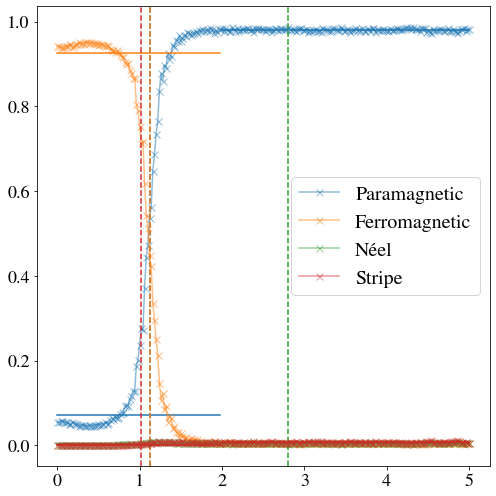

Prediction for rho = 0.8


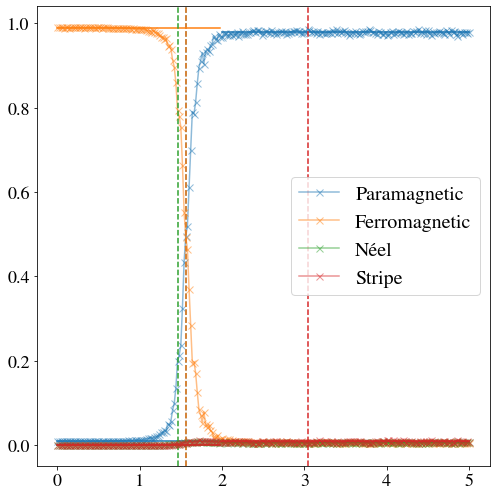

Prediction for rho = 0.9


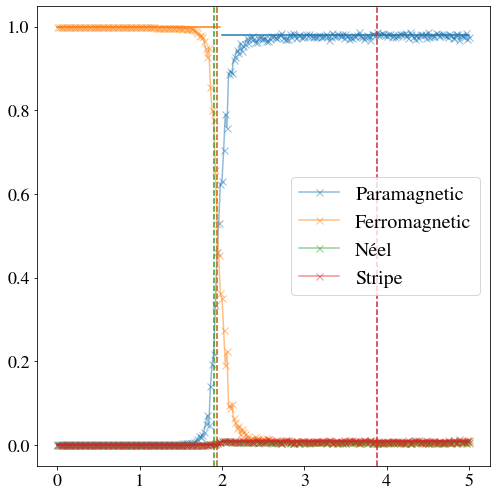

Prediction for rho = 1.0


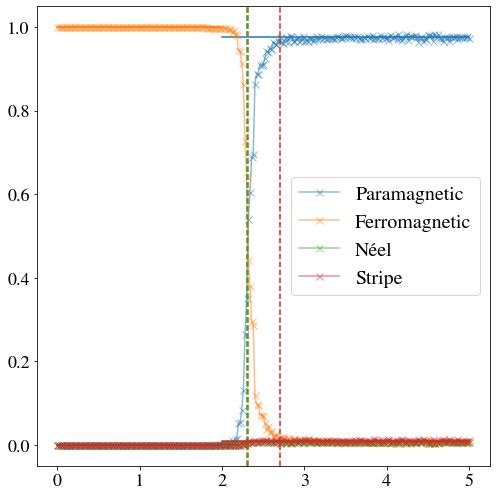

In [46]:
training = ['para','ferro','neel','stripe']

modelsfolder, resultsfolder = auxLib.folders(directory=None, training=training, percolation=True)
saving_folder = os.path.join(resultsfolder,'Half-height')
os.makedirs(saving_folder, exist_ok = True)

critical_temperatures = []

for density_index, density in enumerate(densities):
	print(f'Prediction for rho = {density}')
	tc, plot = auxLib.half_height(resultsfolder, name=f'predictions_{densities_str[density_index]}', prediction=None, graph=True)
	plot.savefig(saving_folder+f'/critical_temperature_{densities_str[density_index]}.pdf') #saving the figure
	plot.show()
	critical_temperatures.append(tc)

In [48]:
temp = pd.DataFrame((np.concatenate((np.array(densities).reshape(len(densities),1), 
                                    np.array(critical_temperatures).reshape(len(densities),1)),axis=1)), 
                                    columns=['Density','Temperature'])
temp.to_csv(os.path.join(saving_folder, 'critical_temperatures_vs_density(half).csv'), index=False)

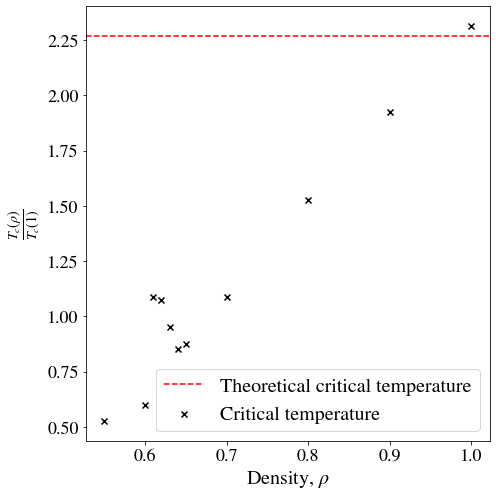

In [57]:
data_df = pd.read_csv(os.path.join(saving_folder,f'critical_temperatures_vs_density(half).csv'), header=0)

plt.figure(figsize=(7, 7))

plt.scatter(data_df['Density'], data_df['Temperature'], marker='x', color='black', label='Critical temperature') # excluding the first neuron
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')

plt.xlabel(r'Density, $\rho$')
plt.ylabel(r'$\frac{T_c(\rho)}{T_c(1)}$')


plt.legend()
plt.savefig(os.path.join(saving_folder, 'critical_temperature_vs_density(half).pdf'))
plt.show()

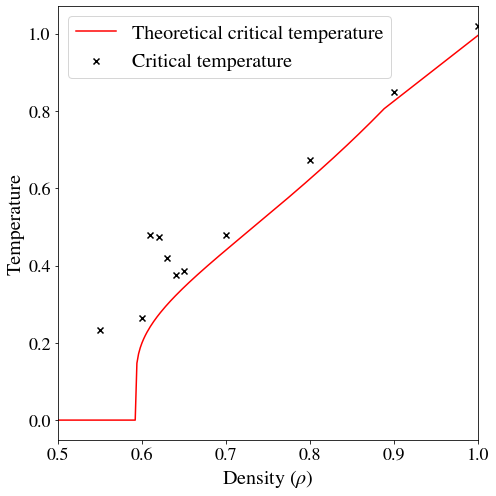

In [58]:
temp = pd.read_csv(os.path.join(saving_folder, f'critical_temperatures_vs_density(half).csv'))

sim_density = np.arange(0.0,1.002,0.002)
theoretical_curve = sim_density*0
for i in range(len(sim_density)):
    if sim_density[i]<0.592746:
        theoretical_curve[i] = 0
    elif sim_density[i]<0.89:
        theoretical_curve[i] = -(0.983)/(np.log(sim_density[i]-0.592746))  
        last_i = i

for i in range(last_i, len(sim_density)):
     theoretical_curve[i] = theoretical_curve[last_i] + 1.7 * (sim_density[i]-sim_density[last_i])

plt.figure(figsize=(7, 7))
plt.scatter(temp['Density'],temp['Temperature']/2.269, marker='x', color='black', label='Critical temperature')#np.array(temp_df['Temperatura'])[-1],'x--')
plt.plot(sim_density, theoretical_curve,'r', label = 'Theoretical critical temperature')
plt.xlabel(r'Density ($\rho$)')
plt.ylabel('Temperature')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='upper left')
plt.xlim(0.5,1)
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures_vs_density.pdf'))
plt.show()


# Considering only Ferromagnetic and Paramagnetic probabilities

Prediction for rho = 0.55


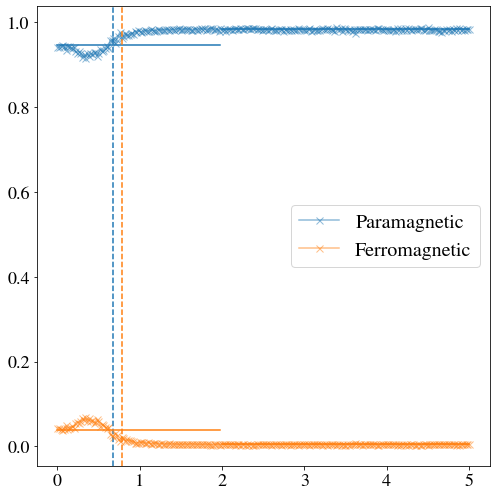

Prediction for rho = 0.6


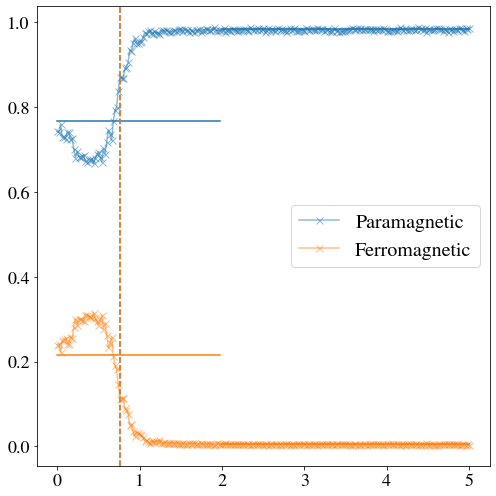

Prediction for rho = 0.61


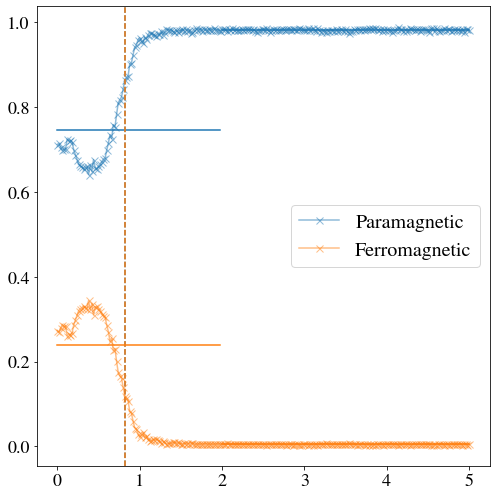

Prediction for rho = 0.62


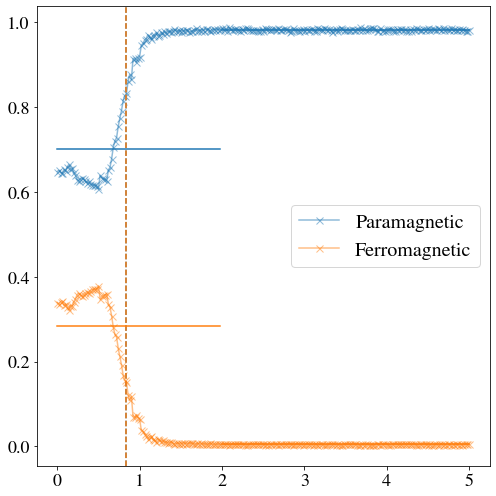

Prediction for rho = 0.63


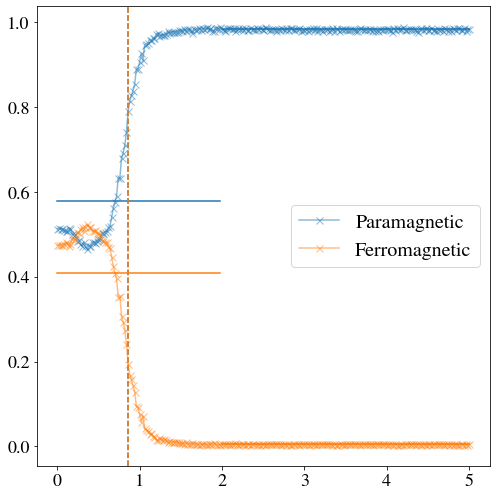

Prediction for rho = 0.64


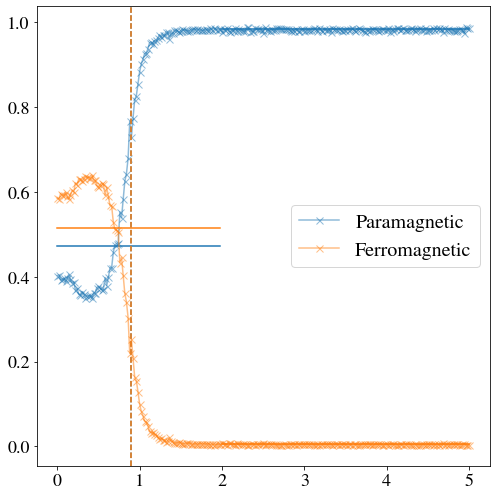

Prediction for rho = 0.65


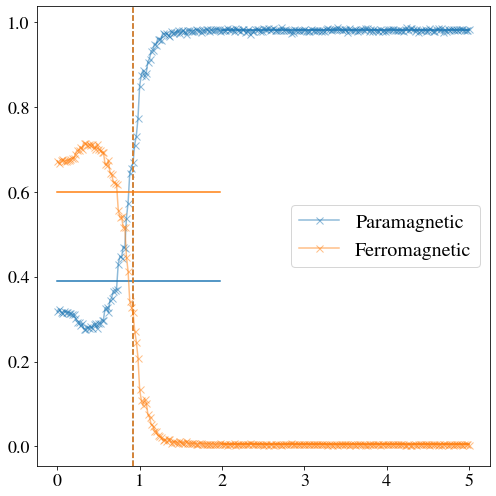

Prediction for rho = 0.7


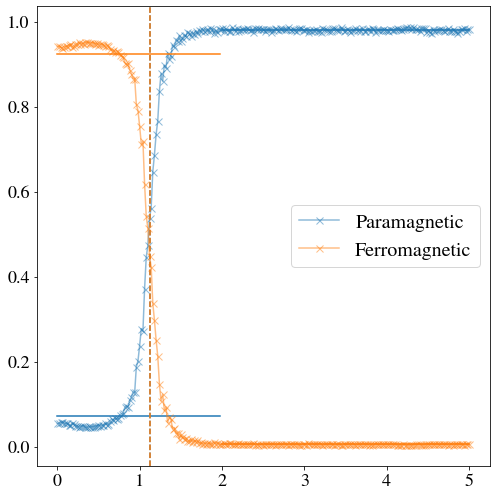

Prediction for rho = 0.8


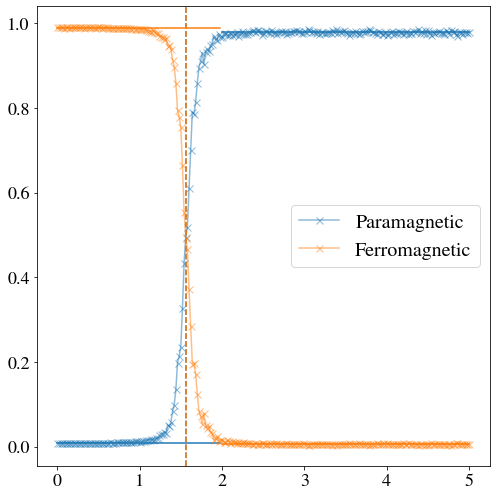

Prediction for rho = 0.9


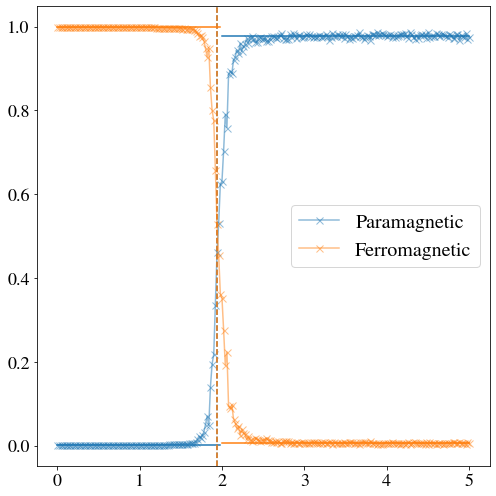

Prediction for rho = 1.0


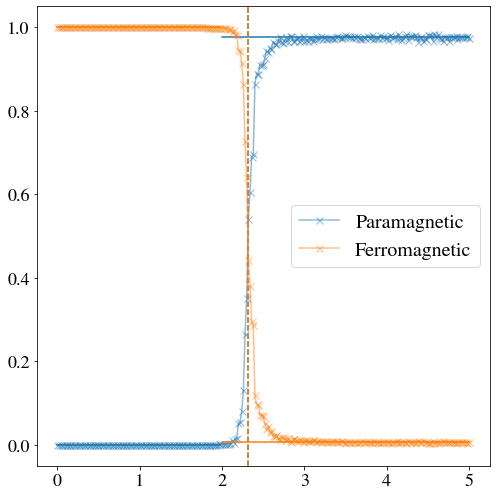

In [64]:
training = ['para','ferro','neel','stripe']

modelsfolder, resultsfolder = auxLib.folders(directory=None, training=training, percolation=True)
saving_folder = os.path.join(resultsfolder,'Half-height')
os.makedirs(saving_folder, exist_ok = True)

critical_temperatures = []

for density_index, density in enumerate(densities):
	print(f'Prediction for rho = {density}')
	prediction = pd.read_csv(resultsfolder+f'/predictions_{densities_str[density_index]}.csv').drop('neel', axis=1)
	prediction = prediction.drop('stripe', axis=1)
	tc, plot = auxLib.half_height(resultsfolder, name=None, prediction=prediction, graph=True)
	if max(prediction['ferro'])<0.5:
		tc = 0
	plot.savefig(saving_folder+f'/(only para and ferro) critical_temperature_{densities_str[density_index]}.pdf') #saving the figure
	plot.show()
	critical_temperatures.append(tc)

In [65]:
temp = pd.DataFrame((np.concatenate((np.array(densities).reshape(len(densities),1), 
                                    np.array(critical_temperatures).reshape(len(densities),1)),axis=1)), 
                                    columns=['Density','Temperature'])
temp.to_csv(os.path.join(saving_folder, '(only para and ferro) critical_temperatures_vs_density(half).csv'), index=False)

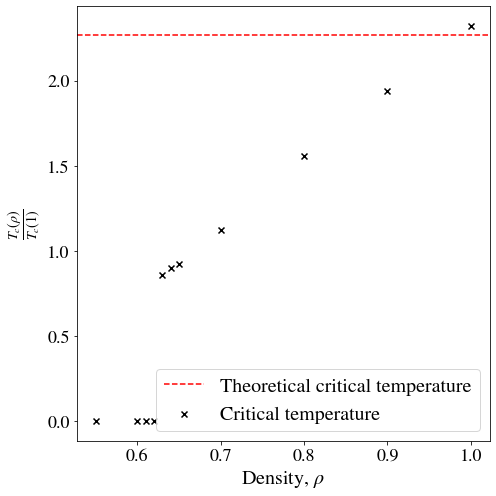

In [66]:
data_df = pd.read_csv(os.path.join(saving_folder,f'(only para and ferro) critical_temperatures_vs_density(half).csv'), header=0)

plt.figure(figsize=(7, 7))

plt.scatter(data_df['Density'], data_df['Temperature'], marker='x', color='black', label='Critical temperature') # excluding the first neuron
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')

plt.xlabel(r'Density, $\rho$')
plt.ylabel(r'$\frac{T_c(\rho)}{T_c(1)}$')


plt.legend()
plt.savefig(os.path.join(saving_folder, '(only para and ferro) critical_temperature_vs_density(half).pdf'))
plt.show()

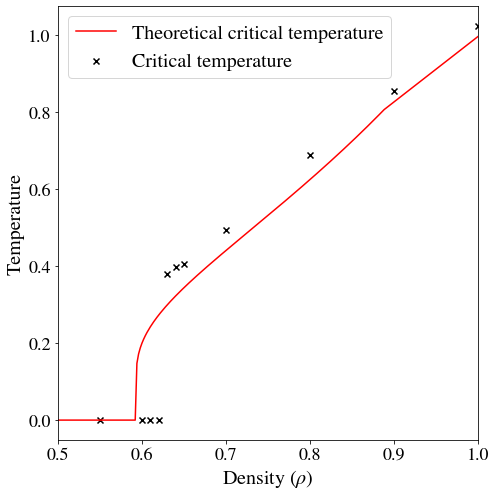

In [67]:
temp = pd.read_csv(os.path.join(saving_folder, f'(only para and ferro) critical_temperatures_vs_density(half).csv'))

sim_density = np.arange(0.0,1.002,0.002)
theoretical_curve = sim_density*0
for i in range(len(sim_density)):
    if sim_density[i]<0.592746:
        theoretical_curve[i] = 0
    elif sim_density[i]<0.89:
        theoretical_curve[i] = -(0.983)/(np.log(sim_density[i]-0.592746))  
        last_i = i

for i in range(last_i, len(sim_density)):
     theoretical_curve[i] = theoretical_curve[last_i] + 1.7 * (sim_density[i]-sim_density[last_i])

plt.figure(figsize=(7, 7))
plt.scatter(temp['Density'],temp['Temperature']/2.269, marker='x', color='black', label='Critical temperature')#np.array(temp_df['Temperatura'])[-1],'x--')
plt.plot(sim_density, theoretical_curve,'r', label = 'Theoretical critical temperature')
plt.xlabel(r'Density ($\rho$)')
plt.ylabel('Temperature')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='upper left')
plt.xlim(0.5,1)
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures_vs_density.pdf'))
plt.show()